In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"/content/wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


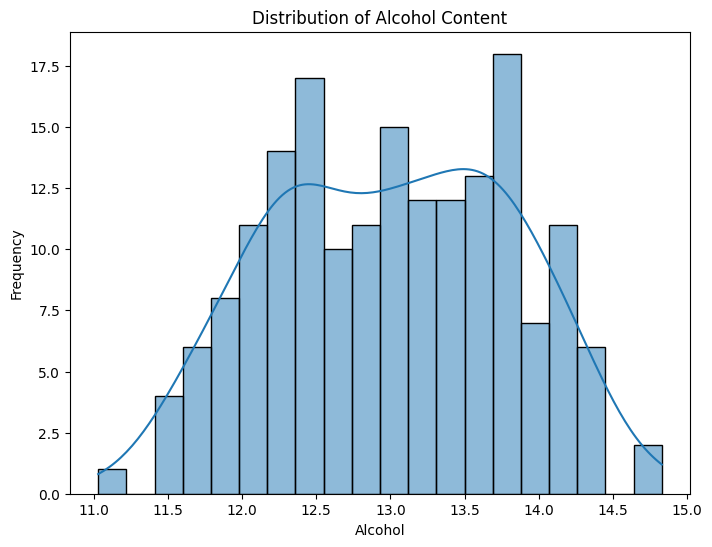

In [ ]:
# Histogram of Alcohol content
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Alcohol', bins=20, kde=True)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

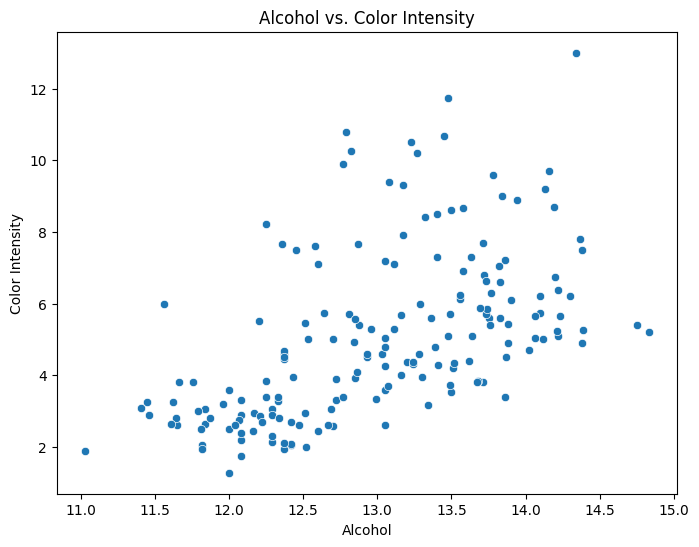

In [ ]:
# Scatter plot of Alcohol vs. Color Intensity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Alcohol', y='Color_Intensity')
plt.title('Alcohol vs. Color Intensity')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.show()

                       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.0723

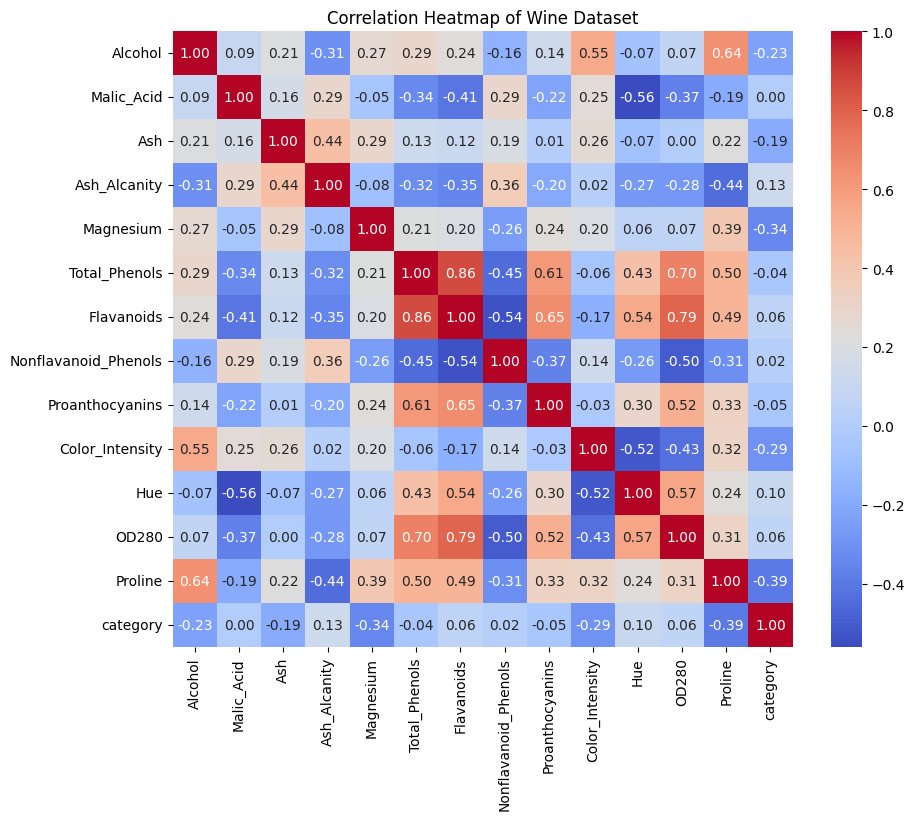

In [15]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Wine Dataset')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

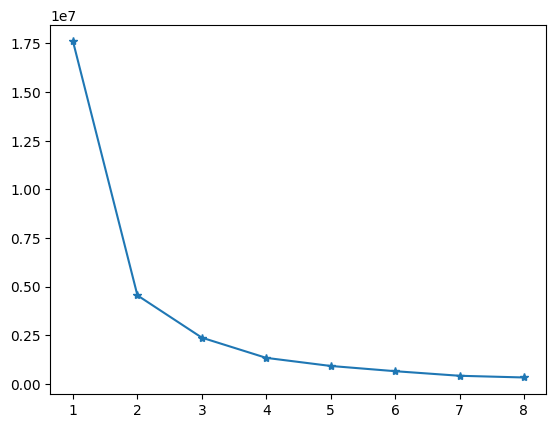

In [ ]:
X = df
wcss = []
for i in range(1,9):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters = i,init = "k-means++",random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,9),wcss,marker = '*')
plt.xticks(range(1,9))
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,init = "k-means++")
X['category'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

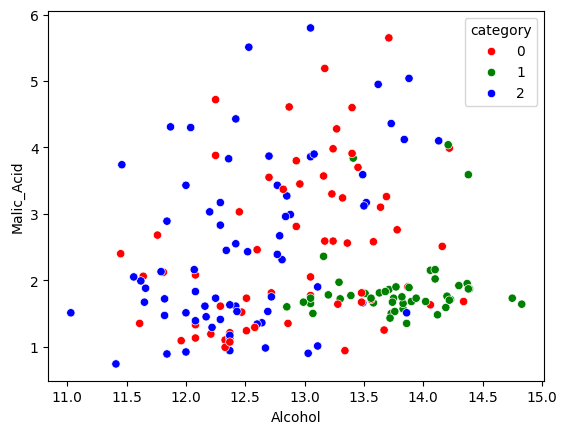

In [ ]:
sns.scatterplot(x = 'Alcohol',y = 'Malic_Acid',hue = 'category',data = df,palette=['red','green','blue'])